## Exploratory analysis

This notebook includes some exploratory analysis on the data set for medical diagnosis

In [3]:
from bs4 import BeautifulSoup
import urllib
import pdb
import json
import os
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train_facts = pickle.load(open('data/training_set.dat','r'))

test_facts = pickle.load(open('data/test_set.dat','r'))

train_stories = [(reduce(lambda x,y: x + y, map(list,fact)),q) for fact,q in train_facts]
test_stories = [(reduce(lambda x,y: x + y, map(list,fact)),q) for fact,q in test_facts]


vocab = sorted(reduce(lambda x, y: x | y, (set(story + [answer]) for story, answer in train_stories + test_stories)))
story_vocab = sorted(reduce(lambda x, y: x | y, (set(story) for story, answer in train_stories + test_stories)))

# Reserve 0 for masking via pad_sequences
vocab_size = len(vocab) + 1
story_maxlen = max(map(len, (x for x, _ in train_stories + test_stories)))


print('-')
print('Vocab size:', vocab_size, 'unique words')
print('Story max length:', story_maxlen, 'words')
print('Number of training stories:', len(train_stories))
print('Number of test stories:', len(test_stories))
print('-')
print('Here\'s what a "story" tuple looks like (input, query, answer):')
print(train_stories[0])
print('-')
print('Vectorizing the word sequences...')



-
('Vocab size:', 21520, 'unique words')
('Story max length:', 1647, 'words')
('Number of training stories:', 133093)
('Number of test stories:', 59394)
-
Here's what a "story" tuple looks like (input, query, answer):
([u'barrett', u'esophagus', u'itself', u'does', u'not', u'cause', u'symptoms', u'.', u'many', u'people', u'with', u'this', u'condition', u'do', u'not', u'have', u'any', u'symptoms', u'.', u'the', u'acid', u'reflux', u'that', u'causes', u'barrett', u'esophagus', u'often', u'leads', u'to', u'symptoms', u'of', u'heartburn', u'.'], u'barrett esophagus')
-
Vectorizing the word sequences...


In [5]:
answer_vocab = sorted(reduce(lambda x, y: x | y, (set([answer]) for _, answer in train_stories + test_stories)))
# Reserve 0 for masking via pad_sequences
answer_dict = dict((word, i) for i, word in enumerate(answer_vocab))
print('Answers dict len: {0}'.format(len(answer_dict)))

Answers dict len: 2350


DescribeResult(nobs=192487, minmax=(4, 1647), mean=122.61276865450654, variance=24135.934935201523, skewness=3.780458033729767, kurtosis=19.974163240940545)


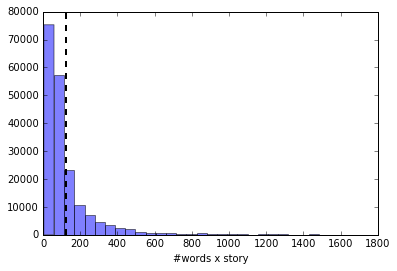

In [6]:
from scipy import stats
import numpy as np

lens = map(len, (x for x, _ in train_stories + test_stories))
print stats.describe(lens)
plt.xlabel('#words x story')
plt.hist(lens, bins=30,alpha=0.5)
plt.axvline(np.array(lens).mean(), color='black', linestyle='dashed', linewidth=2)
plt.savefig('plots/word_by_story.png')

DescribeResult(nobs=192487, minmax=(2, 118), mean=11.537999968829064, variance=153.05061042999489, skewness=2.9519698043011893, kurtosis=12.82327875307992)


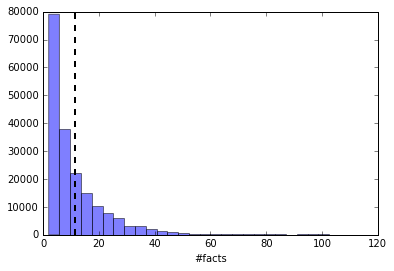

In [7]:
lens = map(len, (x for x, _ in train_facts + test_facts))
print stats.describe(lens)
plt.xlabel('#facts')
plt.hist(lens, bins=30,alpha=0.5)
plt.axvline(np.array(lens).mean(), color='black', linestyle='dashed', linewidth=2)
plt.savefig('plots/facts_by_disease.png')

8
DescribeResult(nobs=2220915, minmax=(2, 111), mean=10.626865053367643, variance=63.421087757828843, skewness=1.34814656662994, kurtosis=3.0186643322827527)


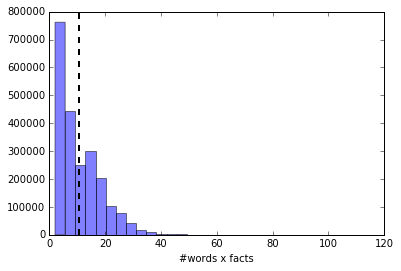

In [8]:
lens = map(len, (x for h,_ in train_facts + test_facts for x in h))
print lens[0]
print stats.describe(lens)
plt.xlabel('#words x facts')
plt.hist(lens, bins=30,alpha=0.5)
plt.axvline(np.array(lens).mean(), color='black', linestyle='dashed', linewidth=2)
plt.savefig('plots/word_by_fact.png')

In [ ]:
#print story_vocab